<a href="https://colab.research.google.com/github/uernana/Final-Project/blob/main/Data_Visualization_IBM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1.1** - Develop a Line plot using the functionality of pandas to show how automobile sales fluctuate from year to year.

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
# resp = await fetch(URL)
# text = io.BytesIO((await resp.arrayBuffer()).to_py())
# import pandas as pd
df = pd.read_csv(URL)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [ ]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [ ]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


Text(0, 0.5, 'Number of Automobiles')

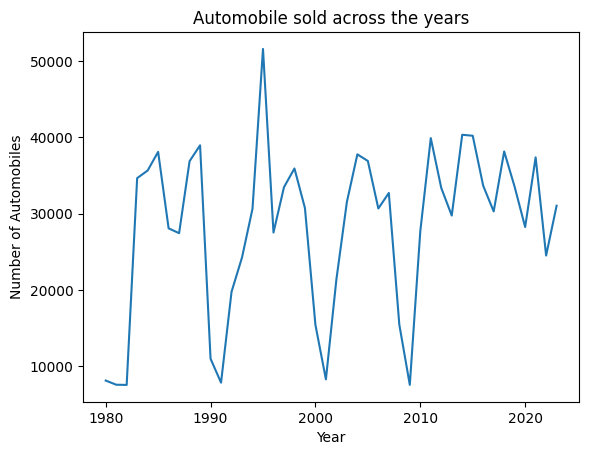

In [ ]:
temp = df.groupby("Year")["Automobile_Sales"].sum()
temp.plot(x="Year", y="Automobile_Sales", kind="line")
plt.title("Automobile sold across the years")
plt.xlabel("Year")
plt.ylabel("Number of Automobiles")

# **TASK 1.2:** Plot different lines for categories of vehicle type and analyse the trend to answer the question "Is there a noticeable difference in sales trends between different vehicle types during recession periods?"

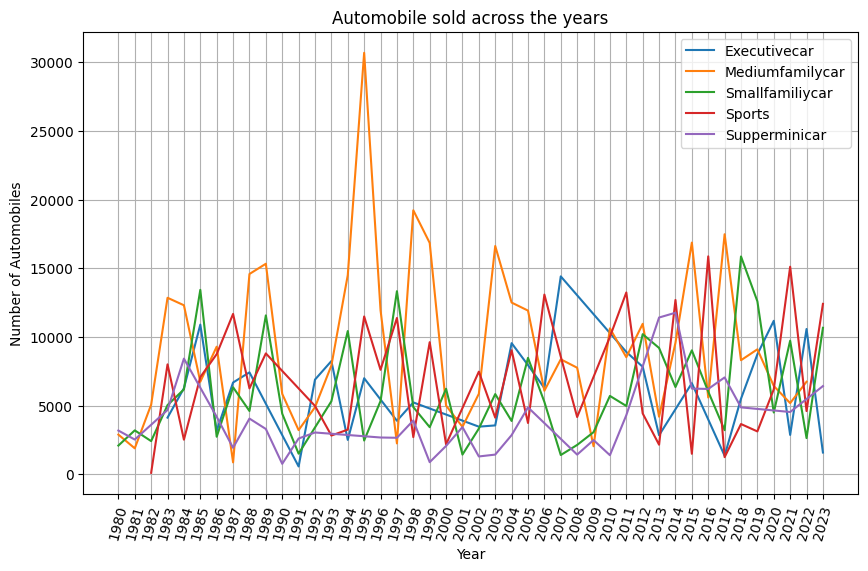

In [ ]:
plt.figure(figsize=(10, 6))
temp = df.groupby(["Year", "Vehicle_Type"])[["Automobile_Sales"]].sum().reset_index()
temp.set_index("Year", inplace=True)
temp = temp.groupby(["Vehicle_Type"])["Automobile_Sales"]
temp.plot(kind="line")
plt.xticks(list(range(df.Year.unique().min(), df.Year.unique().max()+1)), rotation=75)
plt.grid()
plt.title("Automobile sold across the years")
plt.xlabel("Year")
plt.ylabel("Number of Automobiles")
plt.legend()

# **TASK 1.3:** Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

/tmp/ipython-input-1541569326.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


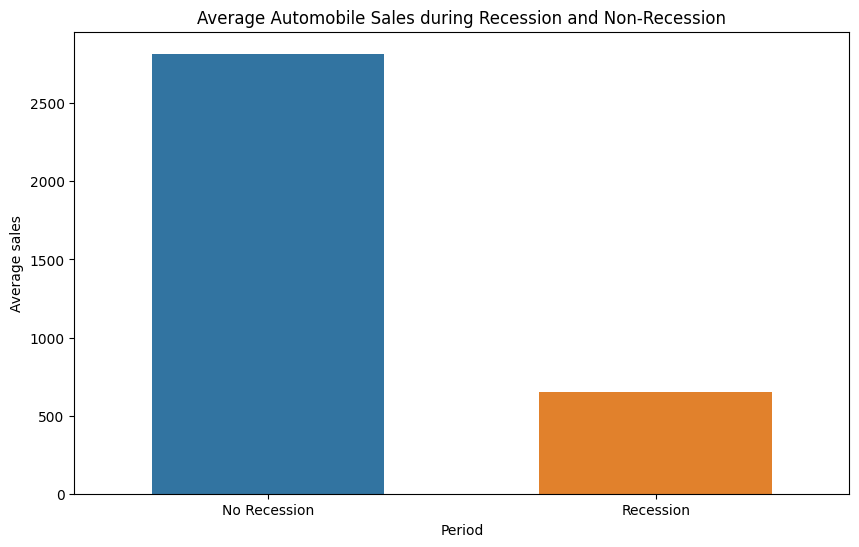

In [ ]:
temp=df.groupby(["Recession"])["Automobile_Sales"].mean().reset_index()
temp["Recession"] = temp["Recession"].replace({0:"No Recession", 1:"Recession"})
# temp
plt.figure(figsize=(10, 6))
sns.barplot(
    data=temp,
    x="Recession",
    y="Automobile_Sales",
    palette=["#1f77b4", "#ff7f0e"],  # màu cho từng cột
    width=0.6                        # độ rộng cột (0 < width <= 1)
)

plt.xlabel('Period')
plt.ylabel('Average sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.show()

Text(0.5, 1.0, 'Average Automobile Sales per Vehicle Type during Recession and Non-Recession')

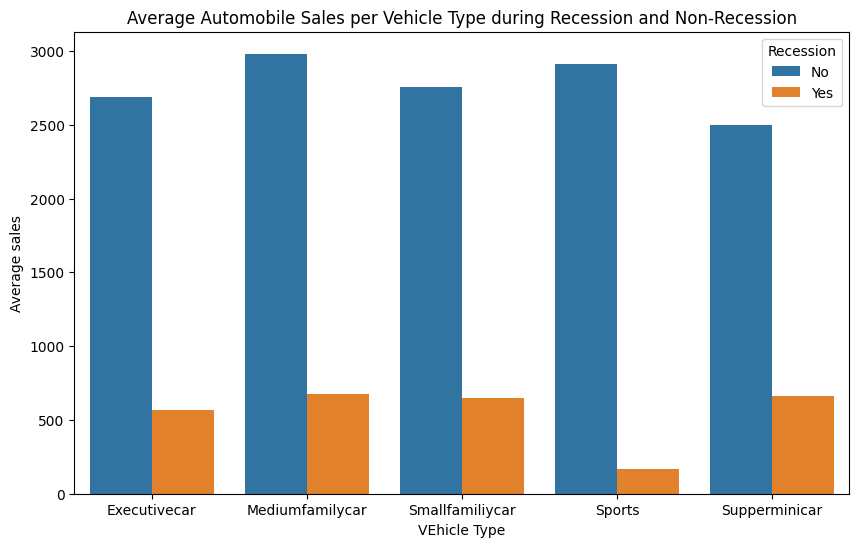

In [ ]:
temp=df.groupby(["Vehicle_Type", "Recession"])["Automobile_Sales"].mean().reset_index()
temp["Recession"] = temp["Recession"].replace({0:"No", 1:"Yes"})
plt.figure(figsize=(10, 6))
sns.barplot(data=temp, x="Vehicle_Type", y="Automobile_Sales", hue="Recession")
plt.xlabel('VEhicle Type')
plt.ylabel('Average sales')
plt.title('Average Automobile Sales per Vehicle Type during Recession and Non-Recession')

# **TASK 1.4:** Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

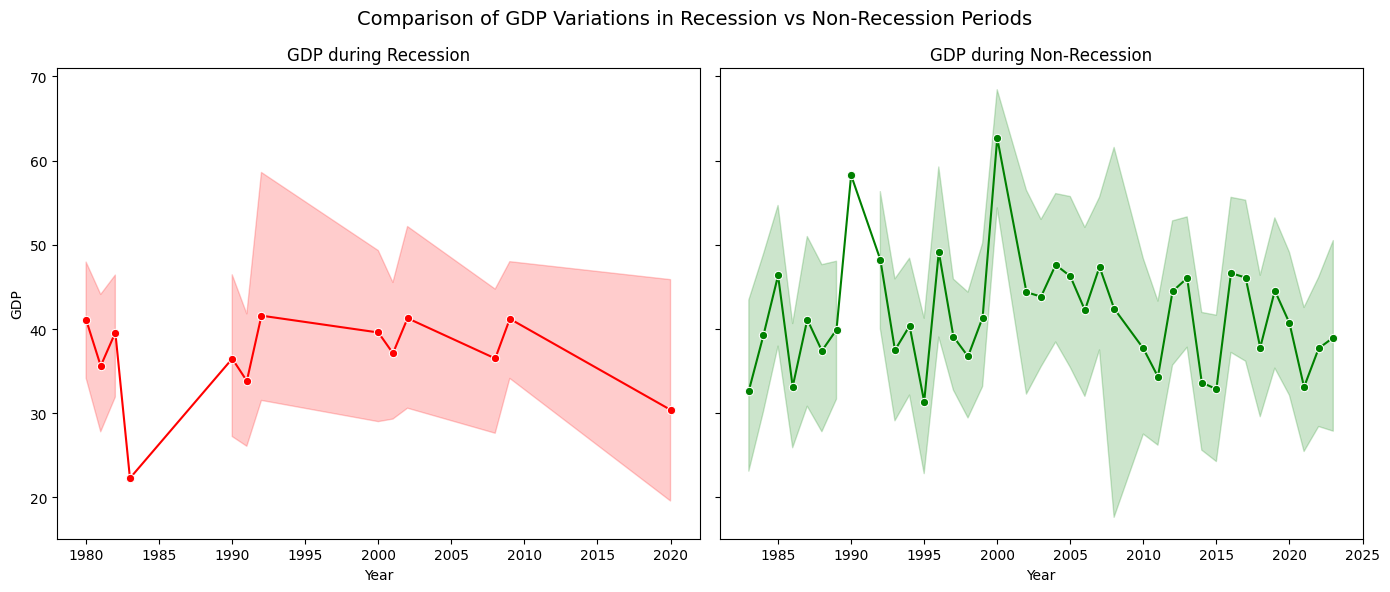

In [ ]:
# Tách dữ liệu recession và non-recession
df_recession = df[df["Recession"] == 1]
df_non_recession = df[df["Recession"] == 0]

# Tạo subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot cho recession
sns.lineplot(ax=axes[0], data=df_recession, x="Year", y="GDP", marker="o", color="red")
axes[0].set_title("GDP during Recession")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("GDP")

# Plot cho non-recession
sns.lineplot(ax=axes[1], data=df_non_recession, x="Year", y="GDP", marker="o", color="green")
axes[1].set_title("GDP during Non-Recession")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("GDP")

plt.suptitle("Comparison of GDP Variations in Recession vs Non-Recession Periods", fontsize=14)
plt.tight_layout()
plt.show()

# **TASK 1.5:** Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

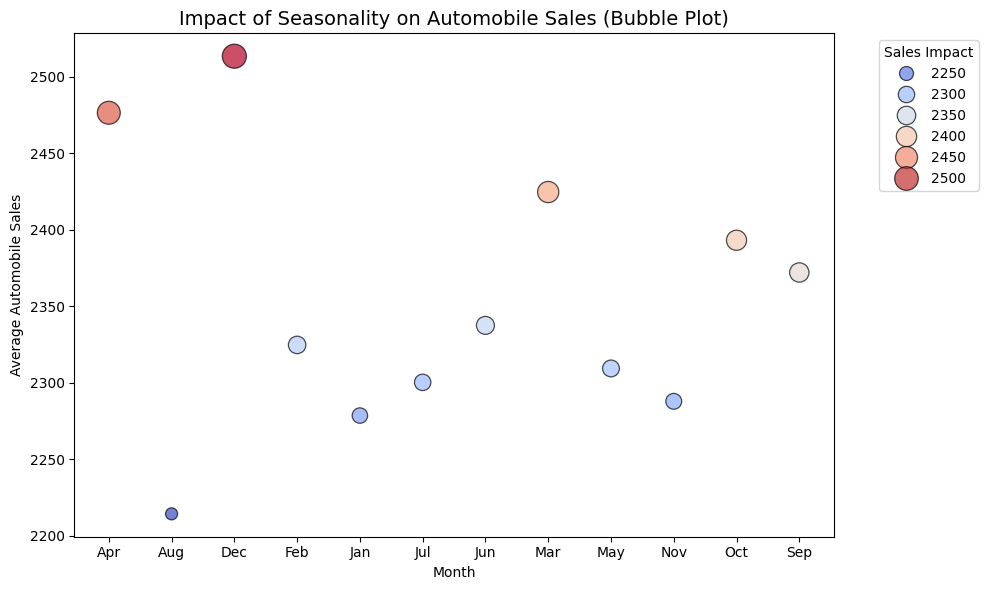

In [ ]:
season_data = df.groupby("Month")["Automobile_Sales"].mean().reset_index(name="Avg_Sales")

plt.figure(figsize=(10, 6))

# bubble plot
sns.scatterplot(
    data=season_data,
    x="Month",
    y="Avg_Sales",            # trung bình sales theo tháng
    size="Avg_Sales",         # độ lớn bubble theo giá trị trung bình
    hue="Avg_Sales",          # màu theo trung bình sales
    sizes=(75, 300),        # scale size (min, max)
    palette="coolwarm",
    alpha=0.7,
    edgecolor="black"
)

plt.title("Impact of Seasonality on Automobile Sales (Bubble Plot)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average Automobile Sales")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Sales Impact")
plt.tight_layout()
plt.show()

# **TASK 1.6:** Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

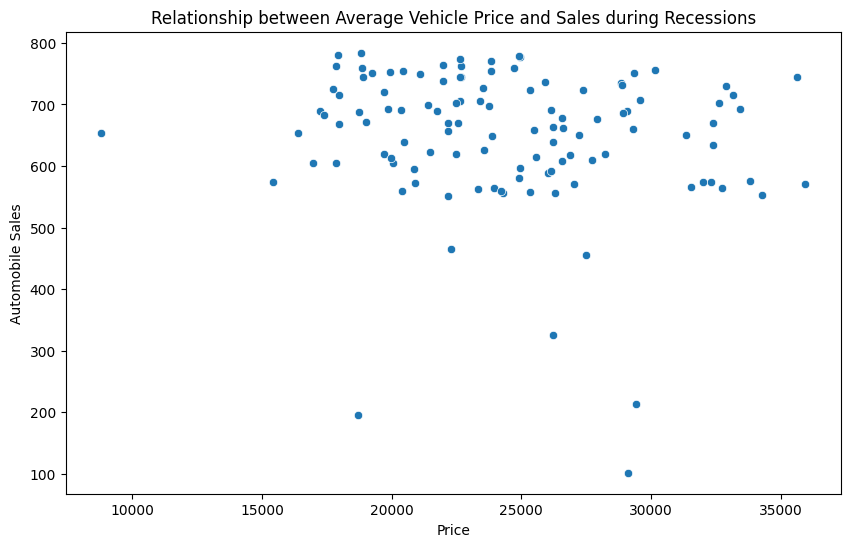

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df["Recession"]==1], x='Price', y='Automobile_Sales')
plt.title("Relationship between Average Vehicle Price and Sales during Recessions")
plt.xlabel("Price")
plt.ylabel("Automobile Sales")
plt.show()

# **TASK 1.7:** Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

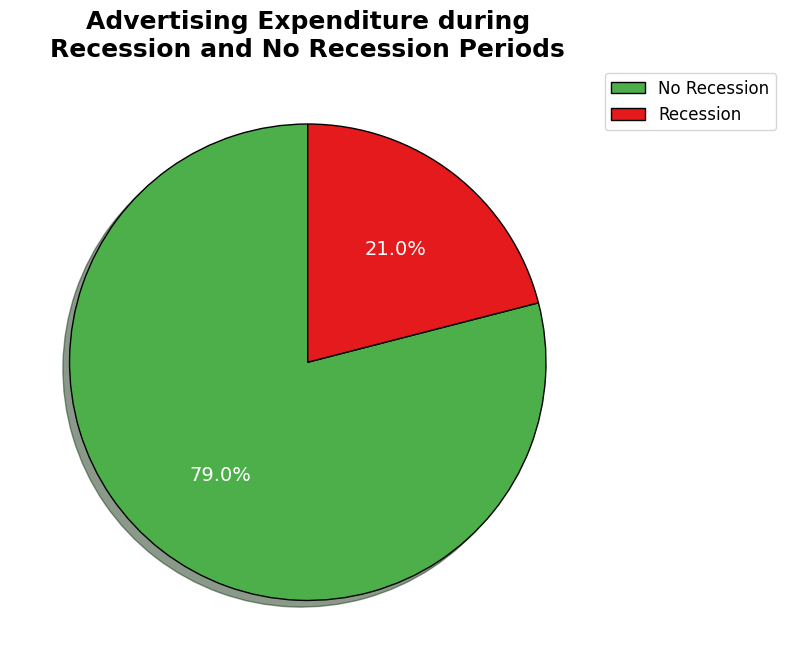

In [ ]:
temp = df.groupby("Recession")["Advertising_Expenditure"].sum()
temp = temp / temp.sum()
temp.index = ["No Recession", "Recession"]

# Vẽ pie chart
plt.figure(figsize=(8, 8))
colors = ["#4daf4a", "#e41a1c"]  # xanh và đỏ
temp.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    colors=colors,
    textprops={'fontsize': 14, 'color': "white"},
    wedgeprops={'edgecolor': 'black'}
)

plt.ylabel("")  # xóa nhãn y dư thừa
plt.title("Advertising Expenditure during\nRecession and No Recession Periods",
          fontsize=18, weight='bold')

plt.legend(temp.index, fontsize=12, loc="upper right", bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()

# **TASK 1.8:** Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

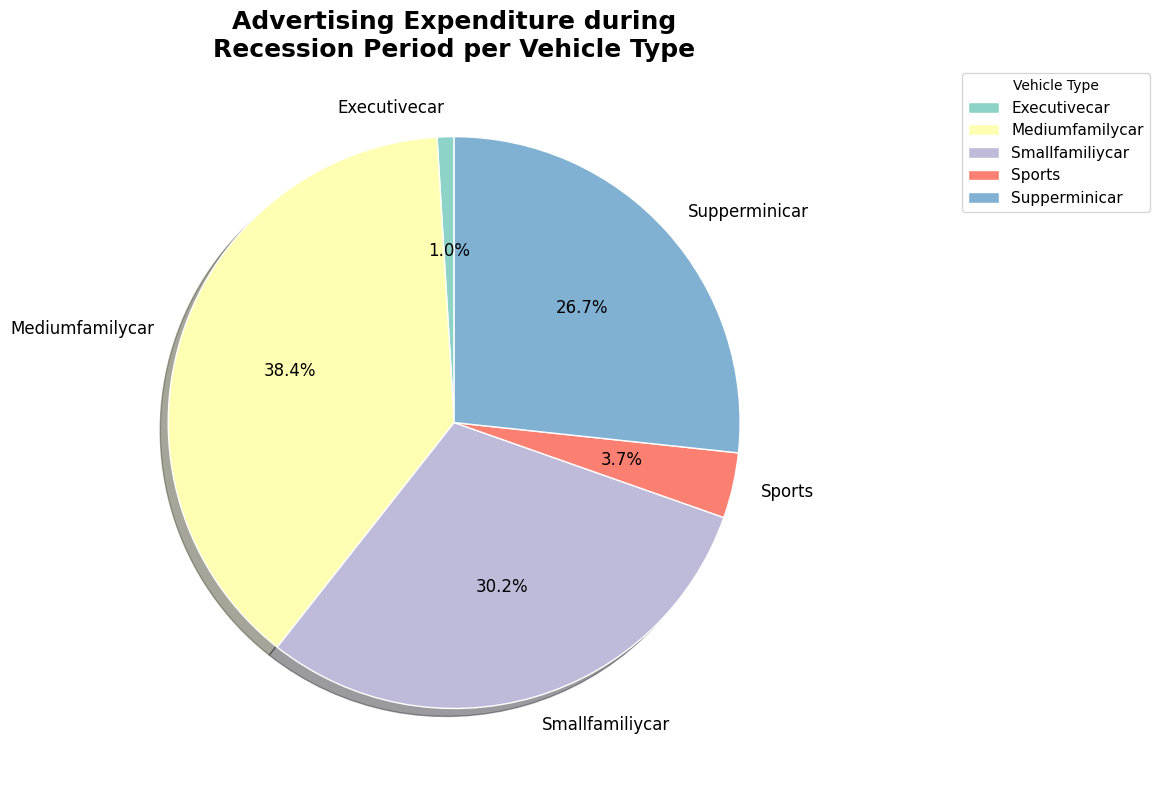

In [ ]:
temp = df[df["Recession"] == 1].groupby("Vehicle_Type")["Advertising_Expenditure"].sum()

# Vẽ pie chart
plt.figure(figsize=(10, 8))
colors = plt.cm.Set3.colors  # bảng màu nhiều sắc thái

temp.plot(
    kind="pie",
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    colors=colors,
    textprops={'color': "black", "size": 12},
    wedgeprops={'edgecolor': 'white'}
)

plt.ylabel("")  # bỏ nhãn y dư thừa
plt.title("Advertising Expenditure during\nRecession Period per Vehicle Type",
          fontsize=18, weight="bold")

plt.legend(title="Vehicle Type", bbox_to_anchor=(1.2, 1), fontsize=11)
plt.tight_layout()
plt.show()

# **TASK 1.9:**  Develop a line plot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

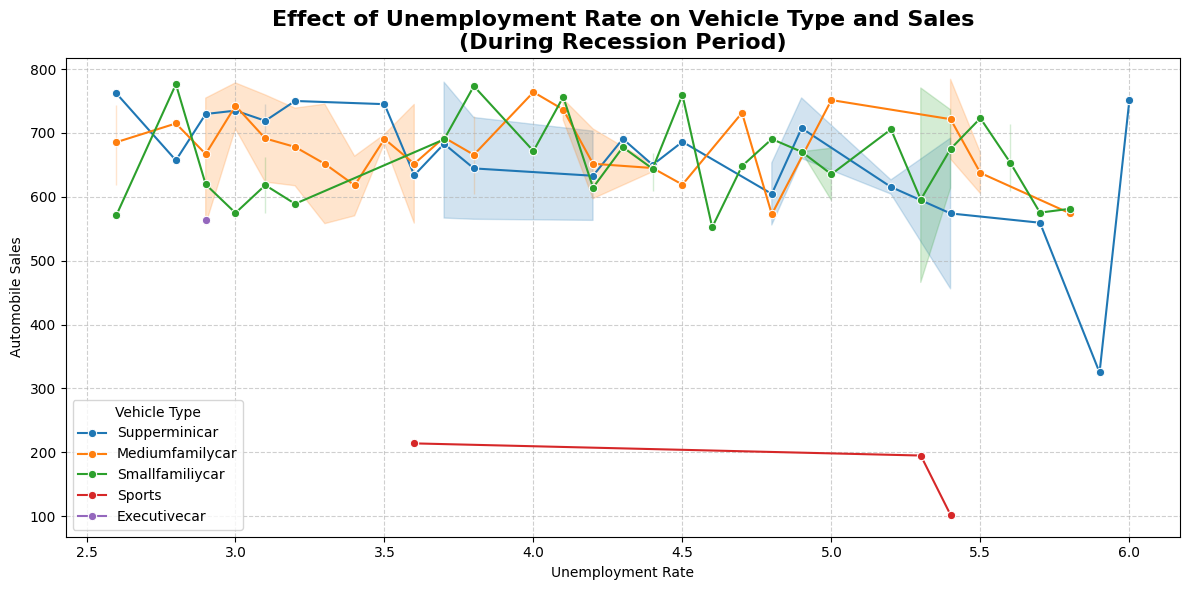

In [ ]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df_recession,
    x="unemployment_rate",
    y="Automobile_Sales",
    hue="Vehicle_Type",
    marker="o"
)

plt.title("Effect of Unemployment Rate on Vehicle Type and Sales\n(During Recession Period)", fontsize=16, weight="bold")
plt.xlabel("Unemployment Rate")
plt.ylabel("Automobile Sales")
plt.legend(title="Vehicle Type", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# **TASK 2.1:** Create a Dash application and give it a meaningful title.

In [ ]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 41.9 MB/s eta 0:00:00


In [ ]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Load the data using pandas
data = pd.read_csv(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv'
)

app = dash.Dash(__name__)

# Set browser tab title
app.title = "Automobile Sales & Recession Dashboard"

# Layout with custom size
app.layout = html.Div([
    # Title
    html.H1(
        "Automobile Sales and Recession Analysis Dashboard",
        style={
            'textAlign': 'center',
            'color': '#503D36',
            'font-size': '32px',
            'margin-bottom': '30px'
        }
    ),

    html.Br(),
    html.Br(),
],
    style={
        'width': '70%',       # chiếm 95% màn hình
        'margin': 'auto',     # căn giữa
        'padding': '20px'     # khoảng cách trong container
    }
)

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

# **TASK 2.2:** Add drop-downs to your dashboard with appropriate titles and options.

In [ ]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd

# Load the data
data = pd.read_csv(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv'
)

# Initialize the Dash app
app = dash.Dash(__name__)
app.title = "Automobile Sales & Recession Dashboard"

# Dropdown options
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]

# List of years
year_list = [{'label': str(i), 'value': i} for i in range(1980, 2024)]

# Layout
app.layout = html.Div([
    # Title
    html.H1(
        "Automobile Sales and Recession Analysis Dashboard",
        style={'textAlign': 'center', 'color': '#503D36', 'font-size': '28px'}
    ),
    html.Br(),

    # Dropdown 1: Statistics type
    html.Div([
        html.H3("Select Statistics Type:", style={'margin-bottom': '10px'}),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=dropdown_options,
            value='Yearly Statistics',
            placeholder="Select a Statistics type",
            style={'width': '60%', 'margin': 'auto'}
        )
    ], style={'margin-bottom': '40px'}),

    # Dropdown 2: Year selection
    html.Div([
        html.H3("Select Year:", style={'margin-bottom': '10px'}),
        dcc.Dropdown(
            id='dropdown-year',
            options=year_list,
            value=2020,
            placeholder="Select a Year",
            style={'width': '60%', 'margin': 'auto'}
        )
    ], style={'margin-bottom': '40px'}),

    # Output container
    html.Div(id='output-container', children=[])
])

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

# **TASK 2.3:** Add a division for output display with appropriate 'id' and 'classname' property.

In [ ]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd

# Load the data
data = pd.read_csv(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv'
)

# Initialize the Dash app
app = dash.Dash(__name__)
app.title = "Automobile Sales & Recession Dashboard"

# Dropdown options
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]

# List of years
year_list = [{'label': str(i), 'value': i} for i in range(1980, 2024)]

# Layout
app.layout = html.Div([
    # Title
    html.H1(
        "Automobile Sales and Recession Analysis Dashboard",
        style={'textAlign': 'center', 'color': '#503D36', 'font-size': '28px'}
    ),
    html.Br(),

    # Dropdown 1: Statistics type
    html.Div([
        html.H3("Select Statistics Type:", style={'margin-bottom': '10px'}),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=dropdown_options,
            value='Yearly Statistics',
            placeholder="Select a Statistics type",
            style={'width': '60%', 'margin': 'auto'}
        )
    ], style={'margin-bottom': '40px'}),

    # Dropdown 2: Year selection
    html.Div([
        html.H3("Select Year:", style={'margin-bottom': '10px'}),
        dcc.Dropdown(
            id='dropdown-year',
            options=year_list,
            value=2020,
            placeholder="Select a Year",
            style={'width': '60%', 'margin': 'auto'}
        )
    ], style={'margin-bottom': '40px'}),

    # Division for output display
    html.Div(
        id='output-container',
        className='output-container',
        children=[]
    )
])

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

# **TASK 2.4:** Creating Callbacks; Define the callback function to update the input container.

In [ ]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Load the data using pandas
data = pd.read_csv(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv'
)

app = dash.Dash(__name__)

# Dropdown options
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]

# Year list for dropdown (convert sang list dict)
year_list = [{'label': str(i), 'value': i} for i in range(1980, 2024)]

# Layout
app.layout = html.Div([
    # Title
    html.H1(
        "Automobile Sales and Recession Analysis Dashboard",
        style={'textAlign': 'center', 'color': '#503D36', 'font-size': '28px'}
    ),
    html.Br(),

    # Dropdown 1: Statistics type
    html.Div([
        html.H3("Select Statistics Type:", style={'margin-bottom': '10px'}),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=dropdown_options,
            value='Yearly Statistics',
            placeholder="Select a Statistics type",
            style={'width': '60%', 'margin': 'auto'}
        )
    ], style={'margin-bottom': '40px'}),

    # Dropdown 2: Year selection
    html.Div([
        html.H3("Select Year:", style={'margin-bottom': '10px'}),
        dcc.Dropdown(
            id='dropdown-year',
            options=year_list,
            value=2020,
            placeholder="Select a Year",
            style={'width': '60%', 'margin': 'auto'}
        )
    ], style={'margin-bottom': '40px'}),

    # Division for output display
    html.Div(id='output-container', className='chart-grid', style={'display':'flex'}),])

# Callback to update input-container based on Report Type
@app.callback(
    Output(component_id='select-year', component_property='disabled'),
    Input(component_id='dropdown-statistics',component_property='value'))

def update_input_container(selected_statistic):
    if selected_statistic =='Yearly Statistics':
        return False
    else:
        return True

@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='select-year', component_property='value'), Input(component_id='dropdown-statistics', component_property='value')])


def update_output_container(selected_year, selected_statistic):
    if selected_statistic == 'Recession Period Statistics':
        # Filter the data for recession periods
        recession_data = data[data['Recession'] == 1]

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

# **TASK 2.5:** Create and display graphs for Recession Report Statistics.

In [ ]:
app = dash.Dash(__name__)

# Dropdown options
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]

# Year list for dropdown (convert sang list dict)
year_list = [{'label': str(i), 'value': i} for i in range(1980, 2024)]

# Layout
app.layout = html.Div([
    # Title
    html.H1(
        "Automobile Sales and Recession Analysis Dashboard",
        style={'textAlign': 'center', 'color': '#503D36', 'font-size': '28px'}
    ),
    html.Br(),

    # Dropdown 1: Statistics type
    html.Div([
        html.H3("Select Statistics Type:", style={'margin-bottom': '10px'}),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=dropdown_options,
            value='Yearly Statistics',
            placeholder="Select a Statistics type",
            style={'width': '60%', 'margin': 'auto'}
        )
    ], style={'margin-bottom': '40px'}),

    # Dropdown 2: Year selection
    html.Div([
        html.H3("Select Year:", style={'margin-bottom': '10px'}),
        dcc.Dropdown(
            id='dropdown-year',
            options=year_list,
            value=2020,
            placeholder="Select a Year",
            style={'width': '60%', 'margin': 'auto'}
        )
    ], style={'margin-bottom': '40px'}),

    # Division for output display
    html.Div(
        id='output-container',
        className='output-container',
        children=[]
    )
])
# Callback function for updating graphs
@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='dropdown-statistics', component_property='value'),
     Input(component_id='dropdown-year', component_property='value')]
)
def update_output(statistics_type, selected_year):
    if statistics_type == 'Recession Period Statistics':
        # Filter recession data
        recession_data = data[data['Recession'] == 1]

        # 1. Line chart: Automobile sales over time during recession
        fig1 = px.line(
            recession_data,
            x="Year",
            y="Automobile_Sales",
            title="Automobile Sales during Recession Periods",
            markers=True
        )

        # 2. Bar chart: Average sales by Vehicle Type during recession
        avg_sales_by_type = recession_data.groupby("Vehicle_Type")["Automobile_Sales"].mean().reset_index()
        fig2 = px.bar(
            avg_sales_by_type,
            x="Vehicle_Type",
            y="Automobile_Sales",
            title="Average Automobile Sales by Vehicle Type (Recession Period)"
        )

        # 3. Scatter plot: Unemployment vs Sales during recession
        fig3 = px.scatter(
            recession_data,
            x="unemployment_rate",
            y="Automobile_Sales",
            color="Vehicle_Type",
            title="Unemployment Rate vs Automobile Sales (Recession Period)",
            size="Automobile_Sales",
            hover_data=['Year']
        )

        return html.Div([
            dcc.Graph(figure=fig1),
            dcc.Graph(figure=fig2),
            dcc.Graph(figure=fig3)
        ])

    else:
        # Default: yearly statistics placeholder
        yearly_data = data[data["Year"] == selected_year]
        fig = px.bar(
            yearly_data,
            x="Vehicle_Type",
            y="Automobile_Sales",
            title=f"Automobile Sales by Vehicle Type in {selected_year}"
        )

        return html.Div([
            dcc.Graph(figure=fig)
        ])
if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

# **TASK 2.6:** Create and display graphs for Yearly Report Statistics.

In [ ]:
app = dash.Dash(__name__)

# Dropdown options
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]

# Year list for dropdown (convert sang list dict)
year_list = [{'label': str(i), 'value': i} for i in range(1980, 2024)]

# Layout
app.layout = html.Div([
    # Title
    html.H1(
        "Automobile Sales and Recession Analysis Dashboard",
        style={'textAlign': 'center', 'color': '#503D36', 'font-size': '28px'}
    ),
    html.Br(),

    # Dropdown 1: Statistics type
    html.Div([
        html.H3("Select Statistics Type:", style={'margin-bottom': '10px'}),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=dropdown_options,
            value='Yearly Statistics',
            placeholder="Select a Statistics type",
            style={'width': '60%', 'margin': 'auto'}
        )
    ], style={'margin-bottom': '40px'}),

    # Dropdown 2: Year selection
    html.Div([
        html.H3("Select Year:", style={'margin-bottom': '10px'}),
        dcc.Dropdown(
            id='dropdown-year',
            options=year_list,
            value=2020,
            placeholder="Select a Year",
            style={'width': '60%', 'margin': 'auto'}
        )
    ], style={'margin-bottom': '40px'}),

    # Division for output display
    html.Div(
        id='output-container',
        className='output-container',
        children=[]
    )
])

# Callback
@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='dropdown-statistics', component_property='value'),
     Input(component_id='dropdown-year', component_property='value')]
)
def update_output(statistics_type, selected_year):
    if statistics_type == 'Recession Period Statistics':
        recession_data = data[data['Recession'] == 1]

        fig1 = px.line(
            recession_data,
            x="Year",
            y="Automobile_Sales",
            title="Automobile Sales during Recession Periods",
            markers=True
        )

        avg_sales_by_type = recession_data.groupby("Vehicle_Type")["Automobile_Sales"].mean().reset_index()
        fig2 = px.bar(
            avg_sales_by_type,
            x="Vehicle_Type",
            y="Automobile_Sales",
            title="Average Automobile Sales by Vehicle Type (Recession Period)"
        )

        fig3 = px.scatter(
            recession_data,
            x="unemployment_rate",
            y="Automobile_Sales",
            color="Vehicle_Type",
            size="Automobile_Sales",
            hover_data=['Year'],
            title="Unemployment Rate vs Automobile Sales (Recession Period)"
        )

        return html.Div([
            dcc.Graph(figure=fig1),
            dcc.Graph(figure=fig2),
            dcc.Graph(figure=fig3)
        ])

    elif statistics_type == 'Yearly Statistics':
        yearly_data = data[data["Year"] == selected_year]

        fig1 = px.bar(
            yearly_data,
            x="Vehicle_Type",
            y="Automobile_Sales",
            color="Vehicle_Type",
            title=f"Total Automobile Sales by Vehicle Type in {selected_year}"
        )

        fig2 = px.pie(
            yearly_data,
            names="Vehicle_Type",
            values="Automobile_Sales",
            title=f"Sales Distribution by Vehicle Type in {selected_year}"
        )

        monthly_sales = yearly_data.groupby("Month")["Automobile_Sales"].sum().reset_index()
        fig3 = px.line(
            monthly_sales,
            x="Month",
            y="Automobile_Sales",
            markers=True,
            title=f"Monthly Automobile Sales Trend in {selected_year}"
        )

        return html.Div([
            dcc.Graph(figure=fig1),
            dcc.Graph(figure=fig2),
            dcc.Graph(figure=fig3)
        ])

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Load the data using pandas
data = pd.read_csv(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/'
    'IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/'
    'historical_automobile_sales.csv'
)

# Initialize the Dash app
app = dash.Dash(__name__)

# Dropdown menu options
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]
# List of years
year_list = [i for i in range(1980, 2024)]

# Layout
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard.",
            style={'textAlign': 'left', 'color': '#503D36', 'font-size': '24px'}),

    html.Div([
        html.Label("Select Statistics:"),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=dropdown_options,
            placeholder='Select a report type'
        )
    ]),

    html.Div([
        dcc.Dropdown(
            id='select-year',
            options=[{'label': i, 'value': i} for i in year_list],
            placeholder='Select Year'
        )
    ]),

    html.Div(id='output-container', className='chart-grid', style={'display': 'flex', 'flexDirection': 'column'})
])


# Enable/disable year dropdown
@app.callback(
    Output('select-year', 'disabled'),
    Input('dropdown-statistics', 'value')
)
def update_input_container(selected_statistic):
    if selected_statistic == 'Yearly Statistics':
        return False
    return True


# Callback for output graphs
@app.callback(
    Output('output-container', 'children'),
    [Input('select-year', 'value'),
     Input('dropdown-statistics', 'value')]
)
def update_output_container(selected_year, selected_statistic):
    if selected_statistic == 'Recession Period Statistics':
        recession_data = data[data['Recession'] == 1]

        # Plot 1: Sales fluctuation during recession
        yearly_rec = recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(
            figure=px.line(yearly_rec, x='Year', y='Automobile_Sales',
                           title="Average Automobile Sales fluctuation over Recession Period"))

        # Plot 2: Avg vehicles sold by type
        average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        R_chart2 = dcc.Graph(
            figure=px.bar(average_sales, x='Vehicle_Type', y='Automobile_Sales',
                          title="Average Number of Vehicles Sold by Vehicle Type"))

        # Plot 3: Advertisement expenditure share
        exp_rec = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        R_chart3 = dcc.Graph(
            figure=px.pie(exp_rec, names='Vehicle_Type', values='Advertising_Expenditure',
                          title='Total Expenditure Share by Vehicle Type during Recessions'))

        # Plot 4: Unemployment rate by vehicle type
        unemployment_rate = recession_data.groupby('Vehicle_Type')['unemployment_rate'].mean().reset_index()
        R_chart4 = dcc.Graph(
            figure=px.bar(unemployment_rate, x='Vehicle_Type', y='unemployment_rate',
                          title='Average Unemployment Rate by Vehicle Type'))

        return [
            html.Div(className='chart-item', children=[R_chart1, R_chart2], style={'display': 'flex'}),
            html.Div(className='chart-item', children=[R_chart3, R_chart4], style={'display': 'flex'})
        ]

    elif selected_statistic == 'Yearly Statistics' and selected_year:
        yearly_data = data[data['Year'] == selected_year]

        # Plot 1: Yearly Automobile sales
        Y_chart1 = dcc.Graph(
            figure=px.line(yearly_data.groupby('Month')['Automobile_Sales'].mean().reset_index(),
                           x='Month', y='Automobile_Sales',
                           title=f'Automobile Sales Trend in {selected_year}'))

        # Plot 2: Monthly Automobile sales
        Y_chart2 = dcc.Graph(
            figure=px.bar(yearly_data.groupby('Month')['Automobile_Sales'].mean().reset_index(),
                          x='Month', y='Automobile_Sales',
                          title=f'Monthly Automobile Sales in {selected_year}'))

        # Plot 3: Avg vehicles sold by type
        Y_chart3 = dcc.Graph(
            figure=px.bar(yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index(),
                          x='Vehicle_Type', y='Automobile_Sales',
                          title=f'Average Vehicles Sold by Vehicle Type in {selected_year}'))

        # Plot 4: Advertisement Expenditure
        exp_data = yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        Y_chart4 = dcc.Graph(
            figure=px.pie(exp_data, names='Vehicle_Type', values='Advertising_Expenditure',
                          title='Total Advertisement Expenditure'))

        return [
            html.Div(className='chart-item', children=[Y_chart1, Y_chart2], style={'display': 'flex'}),
            html.Div(className='chart-item', children=[Y_chart3, Y_chart4], style={'display': 'flex'})
        ]

    return None


if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

In [ ]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Set the title of the dashboard
#app.title = "Automobile Statistics Dashboard"

#---------------------------------------------------------------------------------
# Create the dropdown menu options
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]
# List of years
year_list = [i for i in range(1980, 2024)]
#---------------------------------------------------------------------------------------
# Create the layout of the app
app.layout = html.Div([
    #TASK 2.1 Add title to the dashboard
    html.H1("Automobile Sales Statistics Dashboard.", style={'textAlign':'left', 'color':'#503D36', 'font-size':'24px'}),#May include style for title
    html.Div([#TASK 2.2: Add two dropdown menus
        html.Label("Select Statistics:"),
        dcc.Dropdown(
            id='dropdown-statistics',
            options= dropdown_options,
            value= 'Select Statistics',
            placeholder= 'Select a report type',
        )
    ]),
    html.Div(dcc.Dropdown(
            id='select-year',
            options=[{'label': i, 'value': i} for i in year_list],
            value='Select Year'
        )),
    html.Div([#TASK 2.3: Add a division for output display
    html.Div(id='output-container', className='chart-grid', style={'display':'flex'}),])
])
#TASK 2.4: Creating Callbacks
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='select-year', component_property='disabled'),
    Input(component_id='dropdown-statistics',component_property='value'))

def update_input_container(selected_statistic):
    if selected_statistic =='Yearly Statistics':
        return False
    else:
        return True

#Callback for plotting
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='select-year', component_property='value'), Input(component_id='dropdown-statistics', component_property='value')])


def update_output_container(selected_year, selected_statistic):
    if selected_statistic == 'Recession Period Statistics':
        # Filter the data for recession periods
        recession_data = data[data['Recession'] == 1]
if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Giả sử bạn đã load data
# data = pd.read_csv("automobile_sales.csv")

app = dash.Dash(__name__)

# Dropdown options
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]

# Year list for dropdown
year_list = [{'label': str(i), 'value': i} for i in range(1980, 2024)]

# Layout
app.layout = html.Div([
    # Title
    html.H1(
        "Automobile Sales and Recession Analysis Dashboard",
        style={'textAlign': 'center', 'color': '#503D36', 'font-size': '28px'}
    ),
    html.Br(),

    # Dropdown 1: Statistics type
    html.Div([
        html.H3("Select Statistics Type:", style={'margin-bottom': '10px'}),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=dropdown_options,
            value='Yearly Statistics',
            placeholder="Select a Statistics type",
            style={'width': '60%', 'margin': 'auto'}
        )
    ], style={'margin-bottom': '40px'}),

    # Dropdown 2: Year selection
    html.Div([
        html.H3("Select Year:", style={'margin-bottom': '10px'}),
        dcc.Dropdown(
            id='dropdown-year',
            options=year_list,
            value=2020,
            placeholder="Select a Year",
            style={'width': '60%', 'margin': 'auto'}
        )
    ], style={'margin-bottom': '40px'}),

    # Division for output display
    html.Div(
        id='output-container',
        className='output-container',
        children=[]
    )
])

# Callback function for updating graphs
@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='dropdown-statistics', component_property='value'),
     Input(component_id='dropdown-year', component_property='value')]
)
def update_output(statistics_type, selected_year):
    if statistics_type == 'Recession Period Statistics':
        # Filter recession data
        recession_data = data[data['Recession'] == 1]

        # 1. Line chart: Automobile sales over time during recession
        fig1 = px.line(
            recession_data,
            x="Year",
            y="Automobile_Sales",
            title="Automobile Sales during Recession Periods",
            markers=True
        )

        # 2. Bar chart: Average sales by Vehicle Type during recession
        avg_sales_by_type = recession_data.groupby("Vehicle_Type")["Automobile_Sales"].mean().reset_index()
        fig2 = px.bar(
            avg_sales_by_type,
            x="Vehicle_Type",
            y="Automobile_Sales",
            title="Average Automobile Sales by Vehicle Type (Recession Period)"
        )

        # 3. Pie chart: Share of sales by vehicle type (during recession)
        fig3 = px.pie(
            recession_data,
            names="Vehicle_Type",
            values="Automobile_Sales",
            title="Sales Distribution by Vehicle Type (Recession Period)"
        )

        # 4. Scatter plot: Unemployment vs Sales during recession
        fig4 = px.scatter(
            recession_data,
            x="unemployment_rate",
            y="Automobile_Sales",
            color="Vehicle_Type",
            size="Automobile_Sales",
            hover_data=['Year'],
            title="Unemployment Rate vs Automobile Sales (Recession Period)"
        )

        return html.Div([
            dcc.Graph(figure=fig1),
            dcc.Graph(figure=fig2),
            dcc.Graph(figure=fig3),
            dcc.Graph(figure=fig4)
        ])

    else:  # Yearly Statistics
        yearly_data = data[data["Year"] == selected_year]

        # 1. Bar chart: Total sales by Vehicle Type
        fig1 = px.bar(
            yearly_data,
            x="Vehicle_Type",
            y="Automobile_Sales",
            title=f"Total Automobile Sales by Vehicle Type in {selected_year}"
        )

        # 2. Pie chart: Sales distribution by Vehicle Type
        fig2 = px.pie(
            yearly_data,
            names="Vehicle_Type",
            values="Automobile_Sales",
            title=f"Sales Distribution by Vehicle Type in {selected_year}"
        )

        # 3. Line chart: Monthly sales trend
        monthly_sales = yearly_data.groupby("Month")["Automobile_Sales"].sum().reset_index()
        fig3 = px.line(
            monthly_sales,
            x="Month",
            y="Automobile_Sales",
            markers=True,
            title=f"Monthly Automobile Sales Trend in {selected_year}"
        )

        # 4. Scatter plot: Automobile sales vs Advertising_Expenditure (ví dụ)
        if "Advertising_Expenditure" in yearly_data.columns:
            fig4 = px.scatter(
                yearly_data,
                x="Advertising_Expenditure",
                y="Automobile_Sales",
                color="Vehicle_Type",
                size="Automobile_Sales",
                title=f"Advertising Expenditure vs Automobile Sales in {selected_year}"
            )
        else:
            # Nếu không có cột quảng cáo thì hiển thị scatter khác (Month vs Sales)
            fig4 = px.scatter(
                yearly_data,
                x="Month",
                y="Automobile_Sales",
                color="Vehicle_Type",
                size="Automobile_Sales",
                title=f"Monthly Automobile Sales Distribution in {selected_year}"
            )

        return html.Div([
    html.Div([
        dcc.Graph(figure=fig1, style={'width': '48%', 'display': 'inline-block'}),
        dcc.Graph(figure=fig2, style={'width': '48%', 'display': 'inline-block'})
    ], style={'display': 'flex', 'justify-content': 'space-between'}),

    html.Div([
        dcc.Graph(figure=fig3, style={'width': '48%', 'display': 'inline-block'}),
        dcc.Graph(figure=fig4, style={'width': '48%', 'display': 'inline-block'})
    ], style={'display': 'flex', 'justify-content': 'space-between'})
])

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>